<a href="https://colab.research.google.com/github/myniggname/abednigo.github.io/blob/main/Kmeans_Clustering_Qualitative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This qualitative variable clustering is done in order to exploring more ways to do customer segmentation, though based on customer behavior data in EcommerceU, RFM clustering is still the better option. By doing the qualitative variable, there might be more insights that can be given to the RFM clustering, like cross-clustering between the result. But we are still exploring whether it is needed to do or only RFM clustering is explainable enough.

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import statistics
from scipy import stats
import plotly.express as px
from matplotlib.ticker import PercentFormatter


from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1N1E0CquKZQUKJU_io21Bo7AcO2deg2sHjTyBAEaiqNk/edit#gid=1522510638'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df1 = pd.read_csv(sheet_url_trf)
df1.head()

,transaction_id,transaction_date,timestamp,user_id,status,total_amount,payment_method_id,regist_date,name,gender,province,city,latest_transaction,customer_age,first_transaction
0,202845,8/5/2020,10:44:33 PM,10390,Completed,800000,1,2020-04-23,Hendra Pangestu,male,Jawa Barat,Bandung,9/3/2021,498,4/24/2020
1,307754,12/23/2021,7:21:37 AM,10587,Completed,1920000,1,2020-01-23,Mujur Panji Saptono S.H.,male,Jawa Barat,Bandung,12/23/2021,700,2/2/2020
2,203102,7/5/2020,6:50:41 AM,10587,Completed,1450000,1,2020-01-23,Mujur Panji Saptono S.H.,male,Jawa Barat,Bandung,12/23/2021,700,2/2/2020
3,302225,10/21/2020,10:51:41 PM,20889,Completed,4490000,1,2020-01-04,Padmi Aryani,female,Jawa Barat,Bandung,9/20/2021,625,2/20/2020
4,306290,9/6/2021,5:55:18 PM,10665,Completed,1290000,1,2019-12-25,Prabowo Adiarja Mandala S.Sos,male,Jawa Barat,Bandung,11/12/2021,688,1/7/2020


In [ ]:
total_amount1 = df1['total_amount']/1000
df1['total_amount1'] = total_amount1
df1.head()

,transaction_id,transaction_date,timestamp,user_id,status,total_amount,payment_method_id,regist_date,name,gender,province,city,latest_transaction,customer_age,first_transaction,total_amount1
0,202845,8/5/2020,10:44:33 PM,10390,Completed,800000,1,2020-04-23,Hendra Pangestu,male,Jawa Barat,Bandung,9/3/2021,498,4/24/2020,800.0
1,307754,12/23/2021,7:21:37 AM,10587,Completed,1920000,1,2020-01-23,Mujur Panji Saptono S.H.,male,Jawa Barat,Bandung,12/23/2021,700,2/2/2020,1920.0
2,203102,7/5/2020,6:50:41 AM,10587,Completed,1450000,1,2020-01-23,Mujur Panji Saptono S.H.,male,Jawa Barat,Bandung,12/23/2021,700,2/2/2020,1450.0
3,302225,10/21/2020,10:51:41 PM,20889,Completed,4490000,1,2020-01-04,Padmi Aryani,female,Jawa Barat,Bandung,9/20/2021,625,2/20/2020,4490.0
4,306290,9/6/2021,5:55:18 PM,10665,Completed,1290000,1,2019-12-25,Prabowo Adiarja Mandala S.Sos,male,Jawa Barat,Bandung,11/12/2021,688,1/7/2020,1290.0


In [ ]:
df1[df1['transaction_id'].duplicated()]

,transaction_id,transaction_date,timestamp,user_id,status,total_amount,payment_method_id,regist_date,name,gender,province,city,latest_transaction,customer_age,first_transaction,total_amount1


In [ ]:
df1[['transaction_date','regist_date','latest_transaction','first_transaction']] = df1[['transaction_date','regist_date','latest_transaction','first_transaction']].apply(pd.to_datetime)
df1.head()

,transaction_id,transaction_date,timestamp,user_id,status,total_amount,payment_method_id,regist_date,name,gender,province,city,latest_transaction,customer_age,first_transaction,total_amount1
0,202845,2020-08-05,10:44:33 PM,10390,Completed,800000,1,2020-04-23,Hendra Pangestu,male,Jawa Barat,Bandung,2021-09-03,498,2020-04-24,800.0
1,307754,2021-12-23,7:21:37 AM,10587,Completed,1920000,1,2020-01-23,Mujur Panji Saptono S.H.,male,Jawa Barat,Bandung,2021-12-23,700,2020-02-02,1920.0
2,203102,2020-07-05,6:50:41 AM,10587,Completed,1450000,1,2020-01-23,Mujur Panji Saptono S.H.,male,Jawa Barat,Bandung,2021-12-23,700,2020-02-02,1450.0
3,302225,2020-10-21,10:51:41 PM,20889,Completed,4490000,1,2020-01-04,Padmi Aryani,female,Jawa Barat,Bandung,2021-09-20,625,2020-02-20,4490.0
4,306290,2021-09-06,5:55:18 PM,10665,Completed,1290000,1,2019-12-25,Prabowo Adiarja Mandala S.Sos,male,Jawa Barat,Bandung,2021-11-12,688,2020-01-07,1290.0


In [ ]:
#df1[['timestamp']] = df1[['timestamp']].apply(pd.to_time)
#df1.head()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      10493 non-null  int64         
 1   transaction_date    10493 non-null  datetime64[ns]
 2   timestamp           10493 non-null  object        
 3   user_id             10493 non-null  int64         
 4   status              10493 non-null  object        
 5   total_amount        10493 non-null  int64         
 6   payment_method_id   10493 non-null  int64         
 7   regist_date         10493 non-null  datetime64[ns]
 8   name                10493 non-null  object        
 9   gender              10493 non-null  object        
 10  province            10493 non-null  object        
 11  city                10493 non-null  object        
 12  latest_transaction  10493 non-null  datetime64[ns]
 13  customer_age        10493 non-null  int64     

Q1: 650000.0
Q3: 2050000.0
IQR: 1400000.0
Min: -1450000.0
Max: 4150000.0


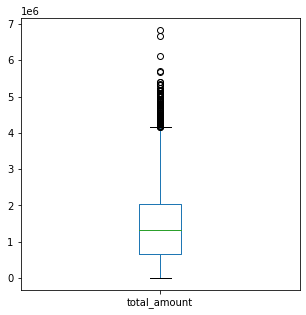

In [ ]:
df_iqr = df1.copy()
df_iqr.boxplot(column=['total_amount'],fontsize=10, rot=0, grid=False, figsize=(5,5), vert=True)
Q1 = df_iqr['total_amount'].quantile(0.25)
Q3 = df_iqr['total_amount'].quantile(0.75)

IQR = Q3-Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

print('Q1:',Q1)
print('Q3:',Q3)
print('IQR:', IQR)
print('Min:', boxplot_min)
print('Max:', boxplot_max)

In [ ]:
filter_payment_min = df_iqr['total_amount'] < boxplot_min
filter_payment_max = df_iqr['total_amount'] > boxplot_max

df_iqr = df_iqr [ ~ 
                                        (filter_payment_min | filter_payment_max)
                                        ]
df_iqr.head()

,transaction_id,transaction_date,timestamp,user_id,status,total_amount,payment_method_id,regist_date,name,gender,province,city,latest_transaction,customer_age,first_transaction,total_amount1
0,202845,2020-08-05,10:44:33 PM,10390,Completed,800000,1,2020-04-23,Hendra Pangestu,male,Jawa Barat,Bandung,2021-09-03,498,2020-04-24,800.0
1,307754,2021-12-23,7:21:37 AM,10587,Completed,1920000,1,2020-01-23,Mujur Panji Saptono S.H.,male,Jawa Barat,Bandung,2021-12-23,700,2020-02-02,1920.0
2,203102,2020-07-05,6:50:41 AM,10587,Completed,1450000,1,2020-01-23,Mujur Panji Saptono S.H.,male,Jawa Barat,Bandung,2021-12-23,700,2020-02-02,1450.0
4,306290,2021-09-06,5:55:18 PM,10665,Completed,1290000,1,2019-12-25,Prabowo Adiarja Mandala S.Sos,male,Jawa Barat,Bandung,2021-11-12,688,2020-01-07,1290.0
5,203528,2020-08-30,3:00:16 PM,20847,Completed,1310000,1,2019-12-26,Icha Fathonah Kusmawati M.TI.,female,Jawa Barat,Bandung,2021-12-26,731,2020-02-04,1310.0


In [ ]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 0 to 10492
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      10390 non-null  int64         
 1   transaction_date    10390 non-null  datetime64[ns]
 2   timestamp           10390 non-null  object        
 3   user_id             10390 non-null  int64         
 4   status              10390 non-null  object        
 5   total_amount        10390 non-null  int64         
 6   payment_method_id   10390 non-null  int64         
 7   regist_date         10390 non-null  datetime64[ns]
 8   name                10390 non-null  object        
 9   gender              10390 non-null  object        
 10  province            10390 non-null  object        
 11  city                10390 non-null  object        
 12  latest_transaction  10390 non-null  datetime64[ns]
 13  customer_age        10390 non-null  int64     

In [ ]:
a = (10493-10390)/10493
a

0.009816067854760316

Q1: 635000.0
Q3: 1967500.0
IQR: 1332500.0
Min: -3362500.0
Max: 5965000.0


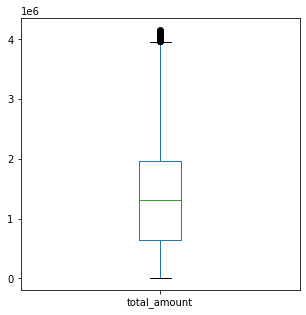

In [ ]:
df_iqr.boxplot(column=['total_amount'],fontsize=10, rot=0, grid=False, figsize=(5,5), vert=True)
Q1a = df_iqr['total_amount'].quantile(0.25)
Q3a = df_iqr['total_amount'].quantile(0.75)

IQRa = Q3a-Q1a
boxplot_mina = Q1a - 3 * IQRa
boxplot_maxa = Q3a + 3 * IQRa

print('Q1:',Q1a)
print('Q3:',Q3a)
print('IQR:', IQRa)
print('Min:', boxplot_mina)
print('Max:', boxplot_maxa)

In [ ]:
df = df_iqr.copy()

Text(0.5, 6.79999999999999, 'total_amount1')

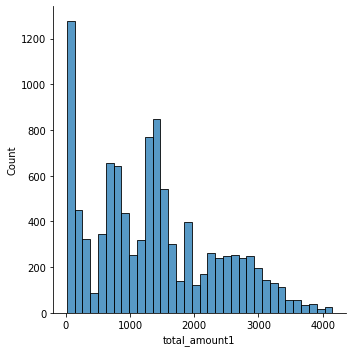

In [ ]:
#Visualizing the data - displot
plot_amount = sns.displot(df["total_amount1"])
plt.xlabel('total_amount1')

In [ ]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))

describe(df[['total_amount1']], ['skew', 'mad', 'kurt'])

,total_amount1
count,10390.000000
mean,1368.050318
std,967.774914
min,15.000000
25%,635.000000
50%,1320.000000
75%,1967.500000
max,4150.000000
skew,0.511161
mad,783.621133


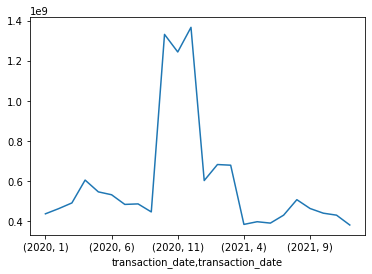

In [ ]:
#Numbers of order per month
df.groupby([df['transaction_date'].dt.year, df['transaction_date'].dt.month]).sum()['total_amount'].plot(kind='line')

# K-means total amount

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 0 to 10492
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      10390 non-null  int64         
 1   transaction_date    10390 non-null  datetime64[ns]
 2   timestamp           10390 non-null  object        
 3   user_id             10390 non-null  int64         
 4   status              10390 non-null  object        
 5   total_amount        10390 non-null  int64         
 6   payment_method_id   10390 non-null  int64         
 7   regist_date         10390 non-null  datetime64[ns]
 8   name                10390 non-null  object        
 9   gender              10390 non-null  object        
 10  province            10390 non-null  object        
 11  city                10390 non-null  object        
 12  latest_transaction  10390 non-null  datetime64[ns]
 13  customer_age        10390 non-null  int64     

In [ ]:
df_cluster1 = df.copy()
df_cluster1 = df_cluster1.drop(df_cluster1.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], axis=1)
df_cluster1.head()

,total_amount1
0,800.0
1,1920.0
2,1450.0
4,1290.0
5,1310.0


In [ ]:
#Import library for segmenting
from sklearn import cluster
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

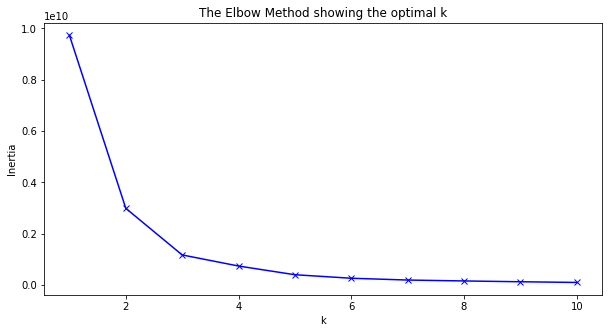

In [ ]:
#Elbow method to show the optimal k
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(df_cluster1)
cluster_label = cluster_model.labels_
df_cluster1['cluster'] = cluster_label
df_cluster1.head()

,total_amount1,cluster
0,800.0,2
1,1920.0,0
2,1450.0,0
4,1290.0,0
5,1310.0,0


In [ ]:
df_cluster01 = df.copy()
df_cluster01 = df_cluster01.drop(df_cluster01.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], axis=1)
df_cluster01.head()

,total_amount1
0,800.0
1,1920.0
2,1450.0
4,1290.0
5,1310.0


In [ ]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(df_cluster1)
cluster_label = cluster_model.labels_
df_cluster01['cluster'] = cluster_label
df_cluster01.head()

,total_amount1,cluster
0,800.0,3
1,1920.0,0
2,1450.0,0
4,1290.0,0
5,1310.0,0


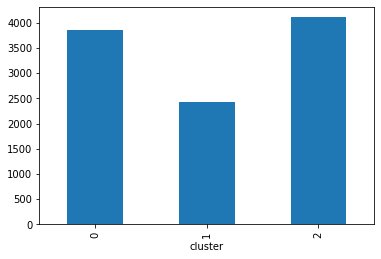

In [ ]:
#Customer total for every cluster
df_cluster1.groupby(df_cluster1['cluster']).count()['total_amount1'].plot(kind='bar')

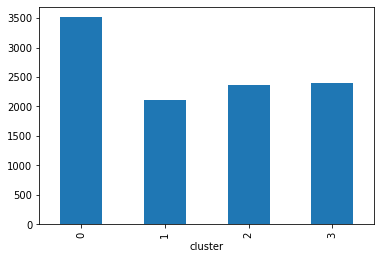

In [ ]:
#Customer total for every cluster
df_cluster01.groupby(df_cluster01['cluster']).count()['total_amount1'].plot(kind='bar')

In [ ]:
#Detail value from all of the clustering, for naming 
df_cluster1.groupby(['cluster'])['total_amount1'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,3850,1465.367948,1440.0,2120.0,970.0
1,2431,2792.502345,2750.0,4150.0,2130.0
2,4109,434.120954,380.0,930.0,15.0


Based on their spending can be clustered to 3 groups:

Cluter 0 -> Middle spending -> Bundling promo so they wanted to pay a bit more for more products
Cluster 1 -> High spending -> Reward for a lot of spends
Cluster 2 -> Low spending -> Notifications when there is promo so they can buy more often

In [ ]:
df_cluster01.groupby(['cluster'])['total_amount1'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,3512,1530.966913,1460.0,2170.0,1175.0
1,2116,142.589792,100.0,450.0,15.0
2,2357,2812.625371,2760.0,4150.0,2175.0
3,2405,792.602495,770.0,1140.0,500.0


# Kmodes Gender and province

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 0 to 10492
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      10390 non-null  int64         
 1   transaction_date    10390 non-null  datetime64[ns]
 2   timestamp           10390 non-null  object        
 3   user_id             10390 non-null  int64         
 4   status              10390 non-null  object        
 5   total_amount        10390 non-null  int64         
 6   payment_method_id   10390 non-null  int64         
 7   regist_date         10390 non-null  datetime64[ns]
 8   name                10390 non-null  object        
 9   gender              10390 non-null  object        
 10  province            10390 non-null  object        
 11  city                10390 non-null  object        
 12  latest_transaction  10390 non-null  datetime64[ns]
 13  customer_age        10390 non-null  int64     

In [ ]:
#Make df consist of payment_type and customer_state
df_cluster2 = df.copy()
df_cluster2 = df_cluster2.drop(df_cluster2.columns[[0,1,2,3,4,5,6,7,8,11,12,13,14,15]], axis=1)
df_cluster2.head()

,gender,province
0,male,Jawa Barat
1,male,Jawa Barat
2,male,Jawa Barat
4,male,Jawa Barat
5,female,Jawa Barat


In [ ]:
#Install library for kmodes
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Install library for kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 9980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 9980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9980.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 837, cost: 5914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6889.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


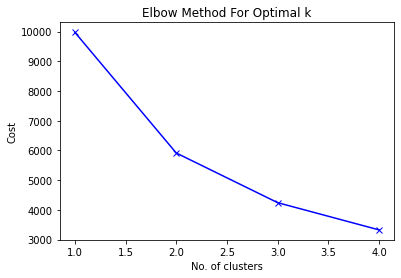

In [ ]:
#Determining how many cluster with elbow method kmodes
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_cluster2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_cluster2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6069.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 484, cost: 5643.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5430.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 566, cost: 5152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 4241.0
Best run was number 5


array([1, 1, 1, ..., 2, 2, 0], dtype=uint16)

In [ ]:
df_cluster2.insert(0, "Cluster", clusters, True)
df_cluster2.head()

,Cluster,gender,province
0,1,male,Jawa Barat
1,1,male,Jawa Barat
2,1,male,Jawa Barat
4,1,male,Jawa Barat
5,1,female,Jawa Barat


In [ ]:
#Result of every cluster woth characteristics
df_cluster2.groupby(['Cluster'])['gender','province'].agg(['unique','count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



gender                                              province  \
                 unique count                                          unique   
Cluster                                                                         
0              [female]  4651  [Jawa Tengah, Jawa Timur, DKI Jakarta, Banten]   
1        [male, female]  2590                                    [Jawa Barat]   
2                [male]  3149  [Jawa Tengah, Jawa Timur, DKI Jakarta, Banten]   

               
        count  
Cluster        
0        4651  
1        2590  
2        3149

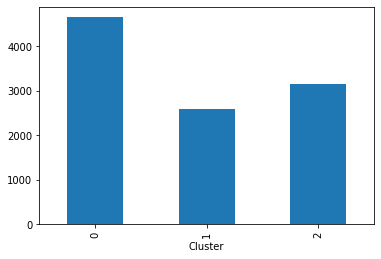

In [ ]:
#Total of customers for every cluster
df_cluster2.groupby(df_cluster2['Cluster']).count()['gender'].plot(kind='bar')

**CONCLUSION(NAMING AND RECOMMENDATION):**

Based on gender and province, we can clustered into 3 clusters which resulted:
Cluster 0 -> female in everywhere except West Java -> Promotion with female needed product
Cluster 1 -> West Java only both female and male -> Customers in West Java can be approached with delivery promo
Cluster 2 -> male in everywhere except West Java -> Promotion with male needed product

# Kmodes payment method and gender

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10390 entries, 0 to 10492
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      10390 non-null  int64         
 1   transaction_date    10390 non-null  datetime64[ns]
 2   timestamp           10390 non-null  object        
 3   user_id             10390 non-null  int64         
 4   status              10390 non-null  object        
 5   total_amount        10390 non-null  int64         
 6   payment_method_id   10390 non-null  int64         
 7   regist_date         10390 non-null  datetime64[ns]
 8   name                10390 non-null  object        
 9   gender              10390 non-null  object        
 10  province            10390 non-null  object        
 11  city                10390 non-null  object        
 12  latest_transaction  10390 non-null  datetime64[ns]
 13  customer_age        10390 non-null  int64     

In [ ]:
df_cluster02 = df.copy()
df_cluster02 = df_cluster02.drop(df_cluster02.columns[[0,1,2,3,4,5,7,8,9,11,12,13,14,15]], axis=1)
df_cluster02.head()

,payment_method_id,province
0,1,Jawa Barat
1,1,Jawa Barat
2,1,Jawa Barat
4,1,Jawa Barat
5,1,Jawa Barat


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 12687.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 12687.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 12687.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 12687.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 12687.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1897, cost: 9644.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10601.0
Init: initializing centroids
Init: initializing clusters
Starting iterati

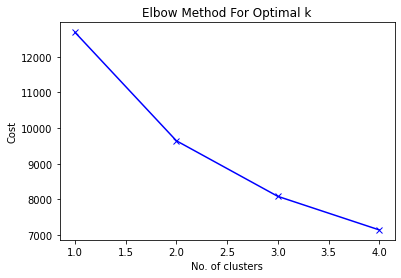

In [ ]:
#Determining how many cluster with elbow method kmodes
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_cluster02)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_cluster02)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8938.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1948, cost: 8787.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 741, cost: 8387.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1402, cost: 8644.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8784.0
Best run was number 3


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [ ]:
df_cluster02.insert(0, "Cluster", clusters, True)
df_cluster02.head()

,Cluster,payment_method_id,province
0,0,1,Jawa Barat
1,0,1,Jawa Barat
2,0,1,Jawa Barat
4,0,1,Jawa Barat
5,0,1,Jawa Barat


In [ ]:
#Result of every cluster woth characteristics
df_cluster02.groupby(['Cluster'])['payment_method_id','province'].agg(['unique','count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



payment_method_id        \
                   unique count   
Cluster                           
0         [1, 2, 3, 4, 5]  5200   
1            [4, 1, 2, 3]  3626   
2                     [5]  1564   

                                               province        
                                                 unique count  
Cluster                                                        
0         [Jawa Barat, Jawa Tengah, Jawa Timur, Banten]  5200  
1        [Jawa Tengah, Jawa Timur, DKI Jakarta, Banten]  3626  
2                                         [DKI Jakarta]  1564

**CONCLUSION(NAMING AND RECOMMENDATION):**

Based on region and payment method, clusters can be devided to 3 clusters:
Cluster 0 -> every payment method everywhere except DKI Jakarta -> clearer payment method steps
Cluster 1 -> anti paylater -> limited promo code with certain payment type
Cluster 2 -> paylater in capital city -> the most modern cluster, can be encouraged with more limit or easier "condition" so they will still buy.